In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\unsupervised_learning_dataset.csv")

In [3]:
df.drop(columns = ['CustomerID','Genre'],inplace = True)

In [4]:
df.rename(columns = {"Annual Income (k$)":'income','Spending Score (1-100)':'spending'},inplace = True)

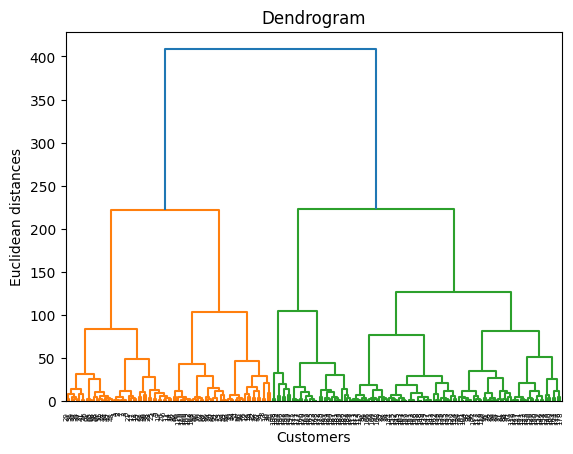

In [5]:
import scipy.cluster.hierarchy as sch

data = sch.linkage(df[['Age','income']], method='ward')

dendrogram = sch.dendrogram(data)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
# Hierarchical Clustering Model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='average', metric='manhattan')

In [9]:
# Fit & Predict
df["h_cluster"] = hc.fit_predict(df[['Age','income']])
df["h_cluster"]

0      3
1      3
2      3
3      3
4      3
      ..
195    2
196    2
197    2
198    2
199    2
Name: h_cluster, Length: 200, dtype: int64

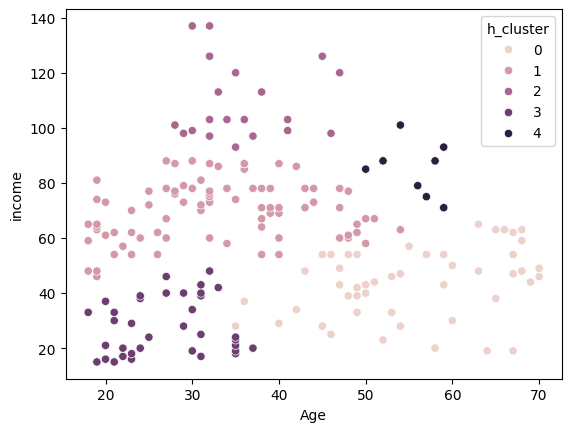

In [8]:
sns.scatterplot(x = 'Age',y = 'income',hue = 'h_cluster',data = df)
plt.show()